# Ensemble Methods Overview

Ensemble methods enhance predictive performance by combining the predictions from multiple machine learning models. These models can range across various algorithms, providing robustness against overfitting and generally better accuracy.

## Key Techniques in Ensemble Methods
- **Voting Classifier**: It aggregates predictions from different models and predicts the class that gets the majority of votes. In regression tasks, it would average out the predictions.

<img src="voting.png" alt="Ensemble Methods Visualization" width="350"/>

- **Bagging**: Short for Bootstrap Aggregating, it builds multiple models from different bootstrap samples of the training dataset. Predictions are made by averaging the outputs (for regression) or by majority voting (for classification).

<img src="Bagging.png" alt="Ensemble Methods Visualization" width="350"/>

- **Random Forest**: It is an ensemble of decision trees, generally trained with the "bagging" method. Random Forests provide an additional measure of feature importance to understand the influence of each feature on the prediction.

<img src="Random-Forest-Algorithm.jpg" alt="Ensemble Methods Visualization" width="350"/>

## Mathematical Formulation
- **Voting**:
  $y_{pred} = \text{mode}(y_{model_1}, y_{model_2}, ..., y_{model_n})$
- **Bagging** (classification):
  $y_{pred} = \frac{1}{n} \sum_{i=1}^{n} y_{model_i}$
- **Random Forest Feature Importance**:
  Feature importance in a Random Forest is assessed based on the decrease in Gini impurity (or any other criterion like information gain) caused by each feature.

## Implementation in Code
In the provided code, ensemble methods are applied to the Breast Cancer Wisconsin (Diagnostic) dataset using Principal Component Analysis (PCA) for dimensionality reduction. The following classifiers are trained and evaluated:
- Logistic Regression
- Random Forest
- Support Vector Machine with a voting classifier

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

## Load Dataset
Here we load the Breast Cancer Wisconsin Diagnostic dataset from scikit-learn, which contains features computed from digitized images of breast mass. The features capture characteristics of the cell nuclei present in the images.

In [2]:
# Load the Breast Cancer Wisconsin (Diagnostic) dataset
bc = load_breast_cancer()
X_bc = bc.data
y_bc = bc.target


## Preprocessing

Principal Component Analysis (PCA) is used to reduce the dataset to two principal components for the purpose of visualization.
The dataset is split into training and testing sets to prepare for model training and evaluation.

In [3]:
# Reduce to two dimensions using PCA for plotting
pca = PCA(n_components=2)
X_bc_pca = pca.fit_transform(X_bc)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bc_pca, y_bc, test_size=0.4, random_state=42)

## Initialize Classifiers

We initialize different classifiers including Logistic Regression, Random Forest, and Support Vector Machine which will be used in ensemble methods.

In [4]:
# Initialize the classifiers
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

## Create Ensemble Classifier

A voting classifier is created which makes predictions based on the majority vote from the three classifiers defined above.

In [5]:
# Hard voting classifier
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')

# Bagging classifier with decision stumps as the base estimator
stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
bag_clf = BaggingClassifier(base_estimator=stump_clf, n_estimators=500, bootstrap=True, n_jobs=-1, random_state=42)

## Train and Evaluate Classifiers

All classifiers are trained, and their performance is evaluated on the test set.

In [6]:
# Train the classifiers
for clf in (log_clf, rnd_clf, svm_clf, voting_clf, bag_clf):
    clf.fit(X_train, y_train)

# Evaluate and print accuracy and classification reports
for clf, name in zip([log_clf, rnd_clf, svm_clf, voting_clf, bag_clf], ['Logistic Regression', 'Random Forest', 'SVC', 'Voting', 'Bagging']):
    y_pred = clf.predict(X_test)
    print(f"{name} accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} classification report:")
    print(classification_report(y_test, y_pred))
    print()

C:\Users\h\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Logistic Regression accuracy: 0.98
Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        80
           1       0.98      0.99      0.99       148

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228


Random Forest accuracy: 0.96
Random Forest classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        80
           1       0.97      0.97      0.97       148

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228


SVC accuracy: 0.96
SVC classification report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        80
           1       0.95      0.99      0.97  

## Visualize Decision Boundaries

Decision boundaries for each classifier are visualized to interpret how each model is making predictions.

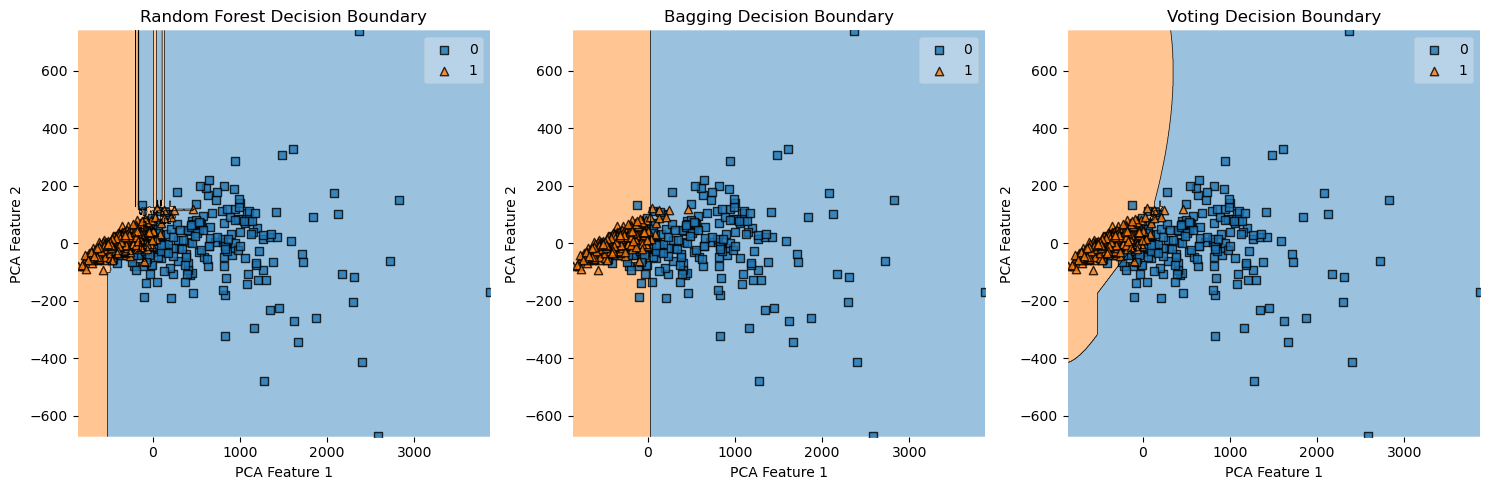

In [9]:
# Plot decision boundaries
classifiers = [rnd_clf, bag_clf, voting_clf]
titles = ['Random Forest', 'Bagging', 'Voting']

fig, axes = plt.subplots(1, len(classifiers), figsize=(15, 5))

for clf, title, ax in zip(classifiers, titles, axes.flatten()):
    plot_decision_regions(X_bc_pca, y_bc, clf=clf, ax=ax)
    ax.set_title(f"{title} Decision Boundary")
    ax.set_xlabel("PCA Feature 1")
    ax.set_ylabel("PCA Feature 2")

plt.tight_layout()  
plt.show()

## Feature Importance Analysis

Random Forest's feature importances are printed out to understand the influence of each original feature before PCA transformation.

In [21]:
# Print Random Forest feature importances
print("Feature importances (based on full feature set, not PCA):")
for name, importance in zip(bc.feature_names, rnd_clf.feature_importances_):
    print(f"{name}: {importance:.4f}")

Feature importances (based on full feature set, not PCA):
mean radius: 0.7062
mean texture: 0.2938


## Conclusion

The ensemble methods we used in our code, including Logistic Regression, Random Forest, SVC, Voting, and Bagging classifiers, all performed with high accuracy on the Breast Cancer dataset. The Logistic Regression stood out with the highest accuracy. The decision boundary plots show the different ways each model classifies the data. Overall, these methods prove to be effective for this particular dataset, with the ensemble approaches slightly outperforming individual classifiers, indicating the benefit of combining multiple models for prediction tasks.